# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- The idea is to go down the references network for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 


## To do:
- remove MetaData class, +clean doi_list
- resolve identical label
- deals with ghost ref, i.e. without doi
- stats:  n ref vs n citation, review vs foundational
- coloring: disconnected component for the 1st generation references, authors based cluster 
- interactive app + flask
- multi doi query: https://github.com/CrossRef/rest-api-doc/issues/301

- look at: https://en.wikipedia.org/wiki/Bibliographic_coupling

### With more data:
- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/), https://search.crossref.org/references

- get country/city/univ  get flag/favicon


### with scopus 'cited by':
- doi list cited by  + cited by count
- query each
- graph


In [1]:
import crossrefexp as exp

In [2]:
store = exp.MetaDataStore('data/cachemetadata_test000.pickle')

341 metadata loaded from `data/cachemetadata_test000.pickle`


In [3]:
doi1 = "10.1103/PhysRevA.62.012306"
doi2 = "10.1103/PhysRevA.97.022108"

In [4]:
# doi = "10.1063/1.337221"

In [5]:
# Query metadata on Crossref
store.query([doi1, doi2])
print( '\n', store.get_info(doi1) )
print( '\n', store.get_info(doi2) )

Query performed in 1.079305 s. (2 doi)
2 metadata returned for 2 asked
data/cachemetadata_test000.pickle saved.

 Electron-spin-resonance transistors for quantum computing in silicon-german...
(2000) Physical Review A
Rutger Vrijen, Eli Yablonovitch, Kang Wang, Hong Wen Jiang, Alex Balandin, Vwani Roychowdhury, Tal Mor, David DiVincenzo
35 references - 31 with doi


 Zeno effect of an open quantum system in the presence of 
1/f
 noise
(2018) Physical Review A
Shu He, Chen Wang, Li-Wei Duan, Qing-Hu Chen
59 references - 57 with doi



growth achieved - 32 nodes in the graph. The last generation number is 1.
growth achieved - 340 nodes in the graph. The last generation number is 2.
growth achieved - 3995 nodes in the graph. The last generation number is 3.
graphs/Vrijen2000_gen3_top3_noSecondaryLink.svg  saved


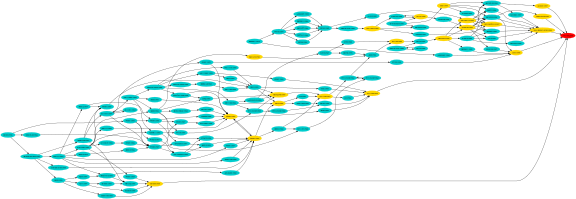

In [6]:
# Build the graph and everything:
gr = store.get_refgraphviz( [doi1], gen=3, top=3, draw_secondary_links=False )
gr

In [8]:
help(store.get_refgraphviz)

Help on method get_refgraphviz in module crossrefexp:

get_refgraphviz(doi_list, gen=2, top=3, save=True, draw_secondary_links=True) method of crossrefexp.MetaDataStore instance
    Build the reference graph for `gen` generations, starting at the
    articles in `doi_list`. Then, keep only the upward graph generated
    from the `top`-cited references. Return a Graphviz object.
    
    Parameters
    ----------
    doi_list : list of doi string or one doi string
    gen : int, default 2
        number of generation
    top : int, default 3
        number of references to start from when generating the upward graph
    save: bool, default True
        if True save the graph in a svg file
    draw_secondary_links: default True
        if False do not draw the secondary links
        (a link is considered secondary if a longer path exist)



In [9]:
# List of the top cited refs.
gr = store.build_a_refgraph( doi1, gen=2 )
print('-- Top cited: --')
for doi, citedby_count in gr.most_cited()[:20]:
    metadata = store.get(doi)
    print( '{}\t cited {} times [gen{}]  {}'.format(metadata.label(),
                                                   citedby_count, 
                                                   gr[doi]['gen'],
                                                   metadata.get('URL')) )

growth achieved - 32 nodes in the graph. The last generation number is 1.
growth achieved - 340 nodes in the graph. The last generation number is 2.
-- Top cited: --
Cirac1995	 cited 7 times [gen1]  http://dx.doi.org/10.1103/physrevlett.74.4091
Feher1959	 cited 6 times [gen1]  http://dx.doi.org/10.1103/physrev.114.1245
Lloyd1993	 cited 6 times [gen2]  http://dx.doi.org/10.1126/science.261.5128.1569
Kohn1955	 cited 5 times [gen2]  http://dx.doi.org/10.1103/physrev.98.915
Pines1957	 cited 5 times [gen2]  http://dx.doi.org/10.1103/physrev.106.489
Feher1959	 cited 5 times [gen1]  http://dx.doi.org/10.1103/physrev.114.1219
Deutsch1989	 cited 5 times [gen2]  http://dx.doi.org/10.1098/rspa.1989.0099
Barenco1995	 cited 4 times [gen1]  http://dx.doi.org/10.1103/physrevlett.74.4083
Honig1958	 cited 4 times [gen2]  http://dx.doi.org/10.1103/physrevlett.1.275
Abrahams1957	 cited 4 times [gen2]  http://dx.doi.org/10.1103/physrev.107.491
Unruh1995	 cited 4 times [gen1]  http://dx.doi.org/10.1103/phy